# TD4 - Geometric transformations

ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

Participants: HAD Ikrame - ASSERMOUH Meryam 


# 1. Straight line Hough transform

Read and run the following example from the scikit examples.

The Hough transform in its simplest form is a method to detect straight lines
[1]_.

In the following example, we construct an image with a line intersection. We
then use the `Hough transform  <https://en.wikipedia.org/wiki/Hough_transform>`__.
to explore a parameter space for straight lines that may run through the image.

Algorithm overview
------------------

Usually, lines are parameterised as $y = mx + c$, with a gradient
$m$ and y-intercept `c`. However, this would mean that $m$ goes to
infinity for vertical lines. Instead, we therefore construct a segment
perpendicular to the line, leading to the origin. The line is represented by
the length of that segment, $r$, and the angle it makes with the x-axis,
$\theta$.

The Hough transform constructs a histogram array representing the parameter
space (i.e., an $M \times N$ matrix, for $M$ different values of
the radius and $N$ different values of $\theta$).  For each
parameter combination, $r$ and $\theta$, we then find the number of
non-zero pixels in the input image that would fall close to the corresponding
line, and increment the array at position $(r, \theta)$ appropriately.

We can think of each non-zero pixel "voting" for potential line candidates. The
local maxima in the resulting histogram indicates the parameters of the most
probably lines. In our example, the maxima occur at 45 and 135 degrees,
corresponding to the normal vector angles of each line.

Another approach is the Progressive Probabilistic Hough Transform [2]_. It is
based on the assumption that using a random subset of voting points give a good
approximation to the actual result, and that lines can be extracted during the
voting process by walking along connected components. This returns the
beginning and end of each line segment, which is useful.

The function `probabilistic_hough` has three parameters: a general threshold
that is applied to the Hough accumulator, a minimum line length and the line
gap that influences line merging. In the example below, we find lines longer
than 10 with a gap less than 3 pixels.

References
----------

.. [1] Duda, R. O. and P. E. Hart, "Use of the Hough Transformation to
       Detect Lines and Curves in Pictures," Comm. ACM, Vol. 15,
       pp. 11-15 (January, 1972)

.. [2] C. Galamhos, J. Matas and J. Kittler,"Progressive probabilistic
       Hough transform for line detection", in IEEE Computer Society
       Conference on Computer Vision and Pattern Recognition, 1999.




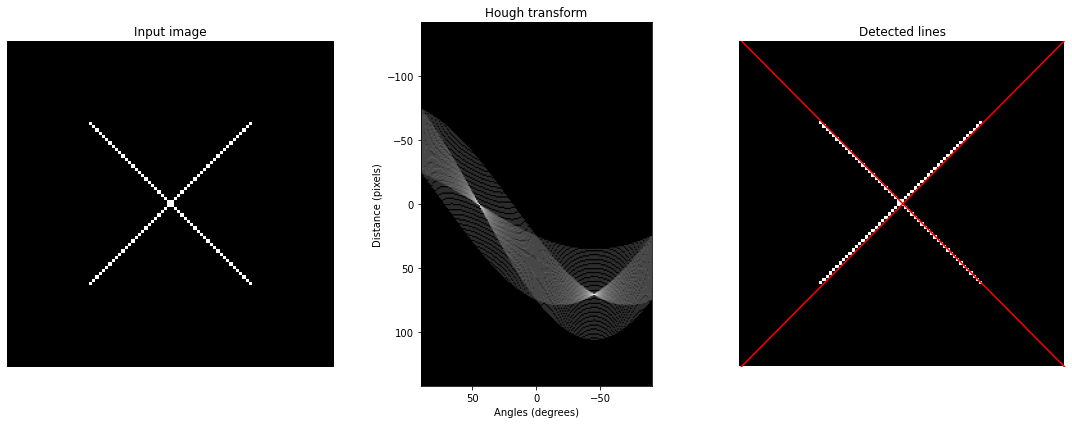

In [1]:
import numpy as np

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm


# Constructing test image cross 
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()



# 2. Hough on own data
### 2.1. Try the hough transform on an increasing number of points and lines 
**a)** create black images with randomly located white points and run the hough example again

**b)** create black images with randomly located white lines and run the hough example again

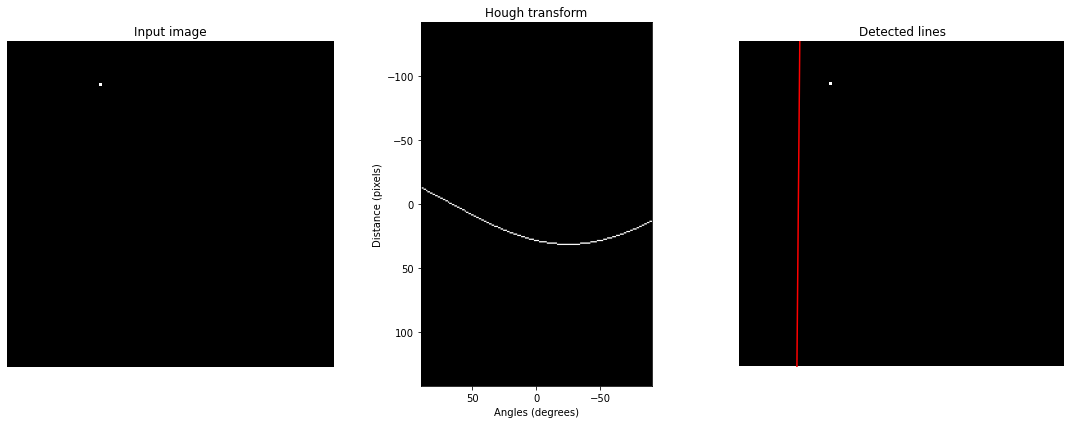

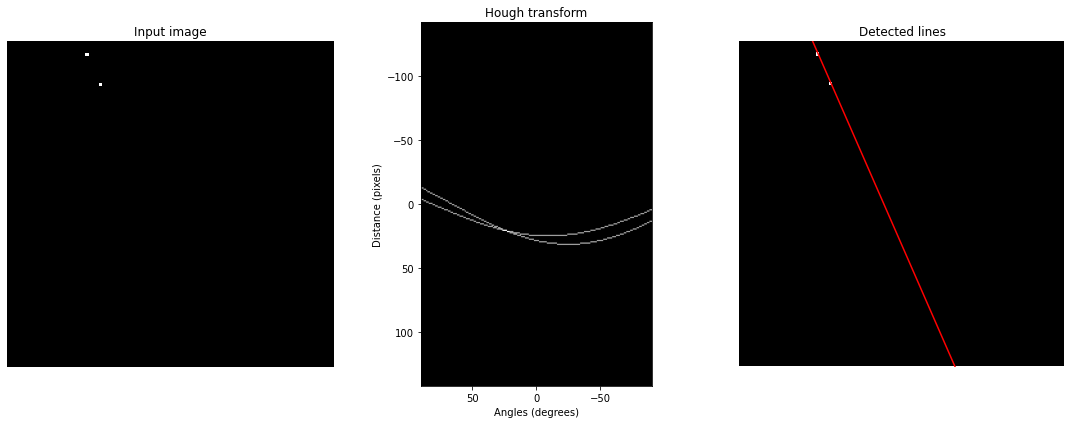

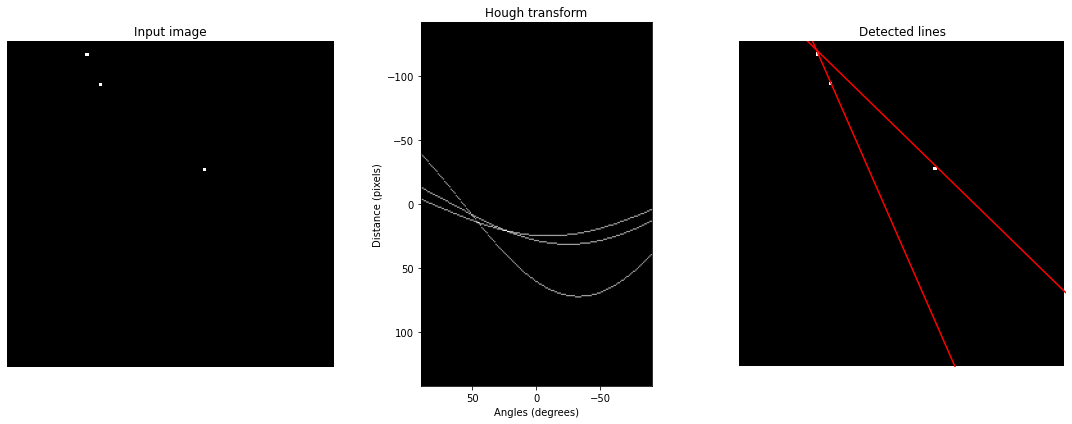

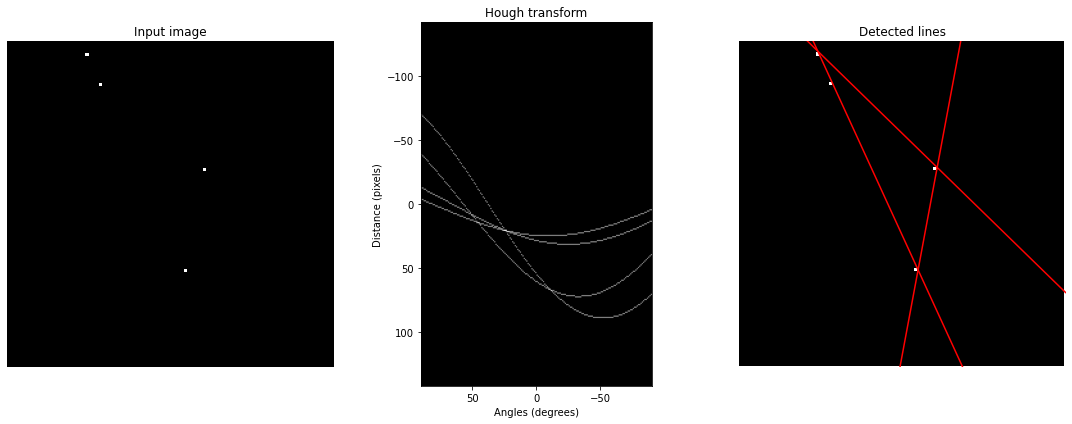

In [2]:
#Hough for an increasing number of points 

import random
imh=100
imw=100
image = np.zeros((imh,imw))
for i in range(4):
    
    #adding a dot
    x = np.floor(random.random() * imh).astype(int)
    y =  np.floor(random.random() * imw).astype(int)
    image[y,x] = 1

    # Classic straight-line Hough transform
    h, theta, d = hough_line(image)

    # Generating figure 
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')

    plt.tight_layout()
    plt.show()

In [3]:
# Adding lines with the following formula
# y = (rho-x*cos(angle))/sin(angle)

def create_line(rho,angle,imh,imw):
    x = np.round(np.linspace(0,imw-1,num=imw*4)).astype(int)
    y = np.round((rho-x*np.cos(angle))/np.sin(angle)).astype(int)
    inside = np.where(np.all([x>=0, y>=0, x<imw, y<imh],axis=0))
    x=x[inside]
    y=y[inside]

    return x,y

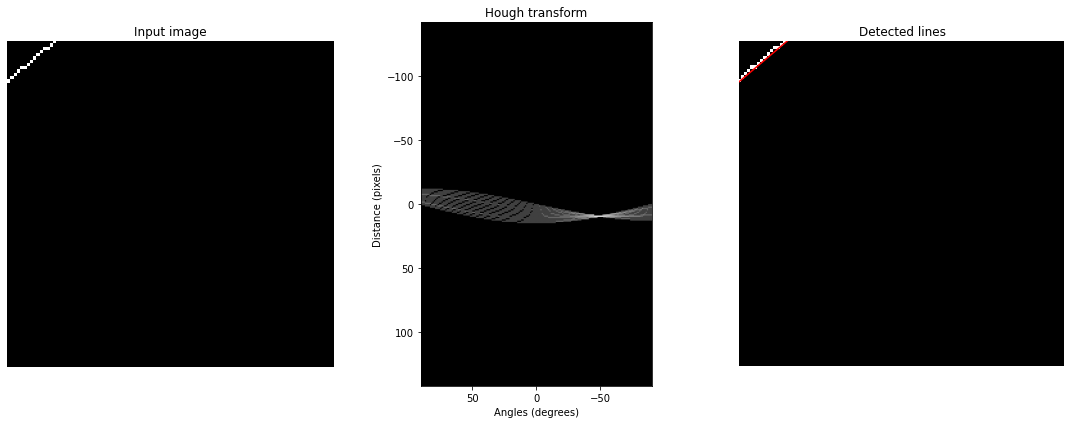

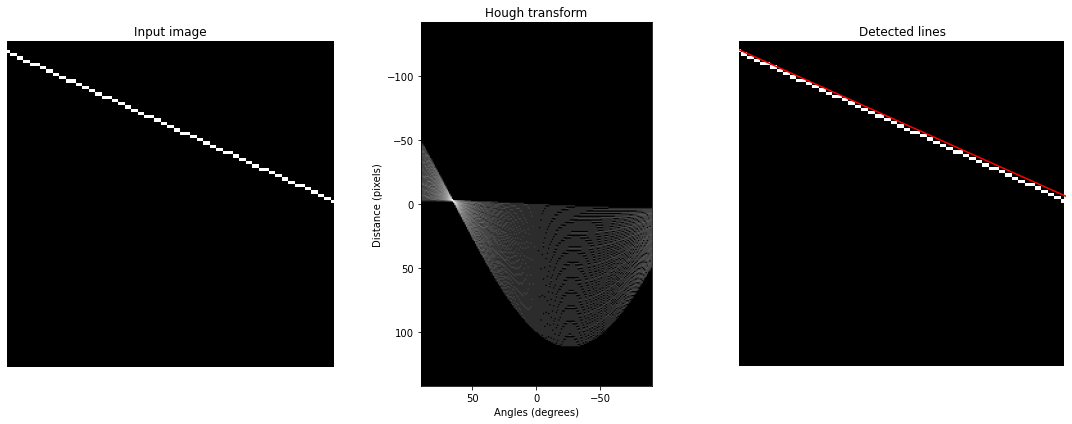

In [4]:
import random

imh=100
imw=100

for i in range(2):
    
    image = np.zeros((imh,imw))

    #adding a line
    
    rho=random.randint(-10,10)
    angle=random.randint(-7,6)
    x,y=create_line(rho,angle,imh,imw)
    image[y,x] = 1

    # Classic straight-line Hough transform
    h, theta, d = hough_line(image)

    # Generating figure 
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, cmap=cm.gray)
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')

    ax[2].imshow(image, cmap=cm.gray)
    for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
        y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
        y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
        ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
    ax[2].set_xlim((0, image.shape[1]))
    ax[2].set_ylim((image.shape[0], 0))
    ax[2].set_axis_off()
    ax[2].set_title('Detected lines')

    plt.tight_layout()
    plt.show()

## 2.2 Try the example on an real image with lines

TRY on the implementaiton on the 'armenia' figure. You may need to adjust the Canny edge results  https://en.wikipedia.org/wiki/Canny_edge_detector

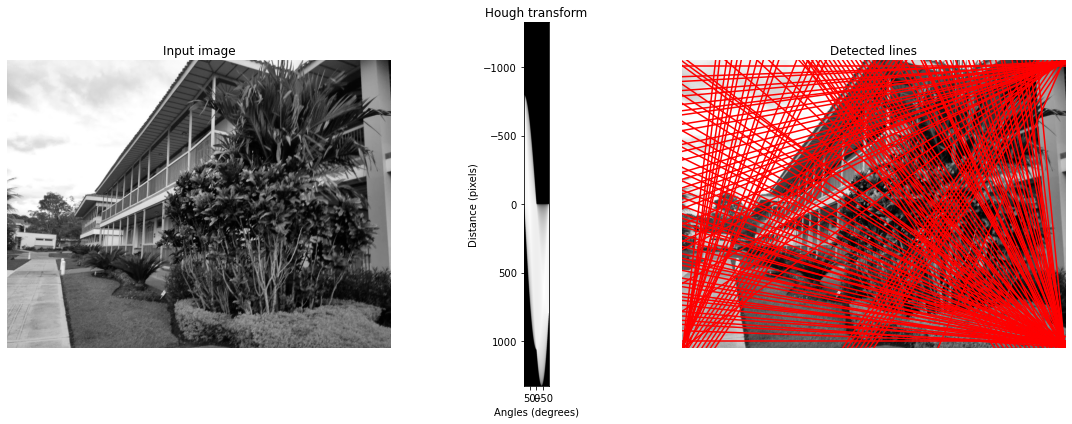

In [5]:
import skimage.io as io
image = io.imread('armenia.jpg',True)

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()


<ipython-input-6-bb03b088847b>:49: RuntimeWarning: divide by zero encountered in true_divide
  angle = np.degrees(np.arctan(im_Gy/im_Gx))
<ipython-input-6-bb03b088847b>:49: RuntimeWarning: invalid value encountered in true_divide
  angle = np.degrees(np.arctan(im_Gy/im_Gx))


Text(0.5, 1.0, 'hysteresis')

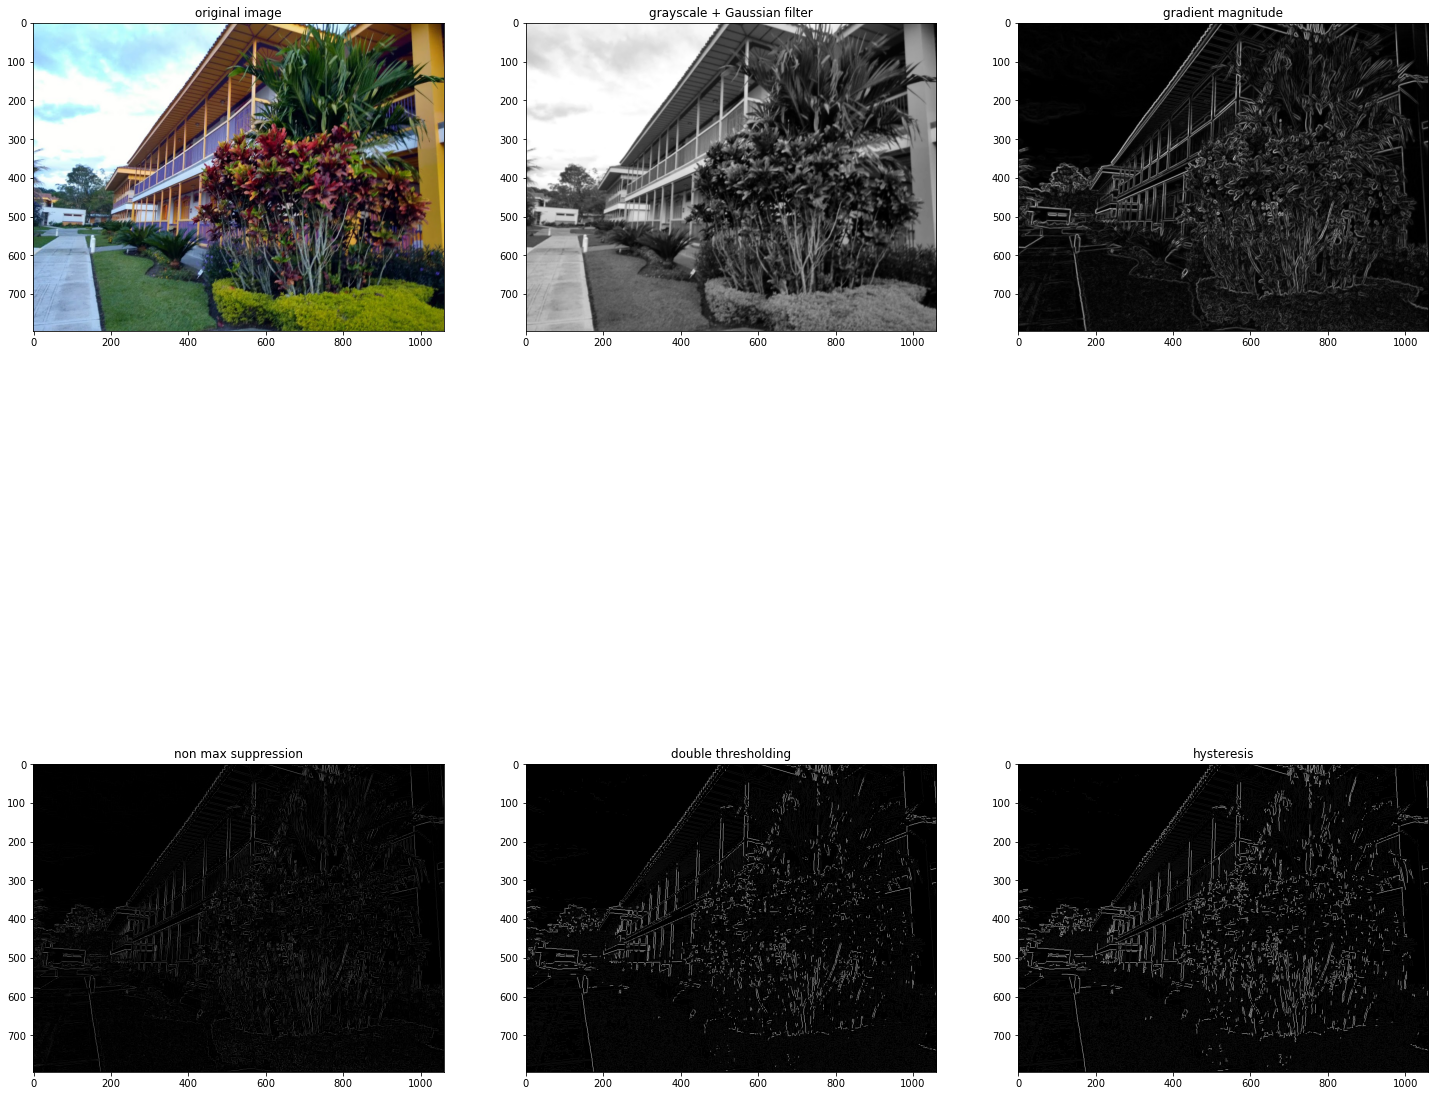

In [6]:
#original image 

image1 = io.imread('armenia.jpg')
fig=plt.figure(figsize=(25,25))
plt.subplot(2,3,1)
plt.imshow(image1)
plt.title('original image')

#Image has been reduced to grayscale, and a 5x5 Gaussian filter with σ=1.4 has been applied

from scipy import ndimage
import math
def gaussianKernel(hs,sig):
    kernel=np.zeros((hs*2+1,hs*2+1))
    M,N=kernel.shape
    for i in range(M): 
        for j in range(N):
            kernel[i][j]=(1/(2*math.pi*sig**2))*math.exp((-i**2-j**2)/(2*sig**2))
    return kernel
kernel_gauss = gaussianKernel(2,1.4)
im_gauss = ndimage.convolve(image,kernel_gauss)
plt.subplot(2,3,2)
plt.imshow(im_gauss,'gray')
plt.title('grayscale + Gaussian filter')

#The intensity gradient of the previous image. The edges of the image have been handled by replicating

def gradient():
    gradient_kernels=[]
    d_x= np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    gradient_kernels.append(d_x)
    d_y=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    gradient_kernels.append(d_y)
    return gradient_kernels

grad=gradient()
im_Gx=ndimage.convolve(im_gauss,grad[0])
im_Gy=ndimage.convolve(im_gauss,grad[1])
im_Gmag=np.sqrt(im_Gx**2+im_Gy**2)
plt.subplot(2,3,3)
plt.imshow(im_Gmag, cmap = 'gray')
plt.title('gradient magnitude')

#Non-maximum suppression applied to the previous image

def non_max_suppression(img):
    M, N = img.shape
    Z = np.zeros((M,N))
    angle = np.degrees(np.arctan(im_Gy/im_Gx))
    angle[angle < 0] += 180
    
    for i in range(1,M-1):
        for j in range(1,N-1):
                q=255
                r=255
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]
                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]*255
                else:
                    Z[i,j] = 0   
    return Z
image_new=non_max_suppression(im_Gmag)
plt.subplot(2,3,4)
plt.imshow(image_new,'gray')
plt.title('non max suppression')

#Double thresholding applied to the previous image. 

def threshold(img,lowThresholdRatio,highThresholdRatio):
    M, N = img.shape
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    res = np.zeros((M,N))
    weak = 25
    strong = 255
    for i in range(M):
        for j in range(N):
            if img[i,j]>= highThreshold:
                strong_i,strong_j=i,j
                res[strong_i,strong_j]=strong 
            elif img[i,j]< lowThreshold:
                zero_i,zero_j=i,j
            elif (img[i,j]<=highThreshold)&(img[i,j]>=lowThreshold):
                weak_i,weak_j=i,j
                res[weak_i,weak_j]=weak
    return res
image_new2=threshold(image_new,0.1,0.3)
plt.subplot(2,3,5)
plt.imshow(image_new2,'gray')
plt.title('double thresholding')

#Hysteresis applied to the previous image

def hysteresis(img,weak,strong):
    M,N=img.shape
    for i in range(1,M-1):
        for j in range(1,N-1):
            if (img[i,j]==weak)&((img[i-1,j-1]==strong)or(img[i-1,j]==strong)or(img[i-1,j+1]==strong)
                                 or(img[i,j-1]==strong)or(img[i,j+1]==strong)or(img[i+1,j-1]==strong)
                                 or(img[i+1,j]==strong)or(img[i+1,j+1]==strong)):
                img[i,j]=strong
    return img 
image_new3=hysteresis(image_new2,25,255)
plt.subplot(2,3,6)
plt.imshow(image_new3,'gray')
plt.title('hysteresis')

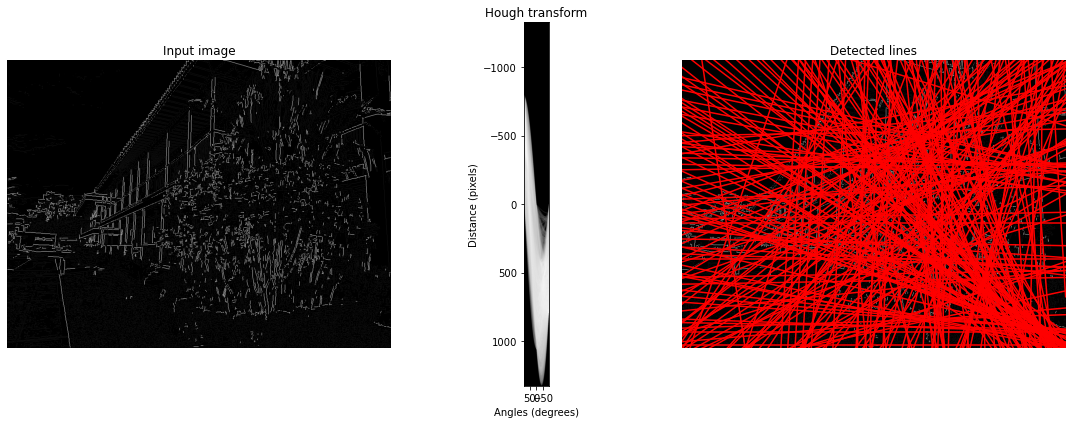

In [180]:
image = image_new3

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()